---

# <center> ★ AI / ML Project - Incurance Claim Anticipation ★
#### <center> ***Domain: Healthcare***

---

<img src="ica.jpg" style="width: 500px;"/>

---

### Description:

A simple yet challenging project, to anticipate weather the insurace will be claimed or not.
The complexity arises due the fact that dataset has less samples, & is slightly imbalanced.
Can you overcome these obstacles & build a good predictive model to classify them?

**This data frame contains the following columns:**

* age : age of policyholder
* sex: gender of policy holder (female=0, male=1)
* bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 25
* steps: average walking steps per day of policyholder
* children: number of children / dependents of policyholder
* smoker: smoking state of policyholder (non-smoke=0;smoker=1)
* region: the residential area of policyholder in the US (northeast=0, northwest=1, southeast=2, southwest=3)
* charges: individual medical costs billed by health insurance
* insuranceclaim: yes=1, no=0

This is "Sample Insurance Claim Prediction Dataset" which based on "[Medical Cost Personal Datasets][1]" to update sample value on top.

### Objective:
- Understand the Dataset & cleanup (if required).
- Build classification model to predict weather the insurance will be claimed or not.
- Also fine-tune the hyperparameters & compare the evaluation metrics of vaious classification algorithms.

---

## <center> Stractegic Plan of Action:

**We aim to solve the problem statement by creating a plan of action, Here are some of the necessary steps:**
1. Data Exploration
2. Exploratory Data Analysis (EDA)
3. Data Pre-processing
4. Data Manipulation
5. Feature Selection/Extraction
6. Predictive Modelling
7. Project Outcomes & Conclusion

---

## <center>1. Data Exploration

In [49]:
#Importing the basic librarires

import os
import math
import numpy as np
import pandas as pd
import seaborn as sns
from IPython.display import display

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10,6]

import warnings 
warnings.filterwarnings('ignore')

In [50]:
#Importing the dataset


df = pd.read_csv('insurance2.csv')

target = 'insuranceclaim'
labels = ['Claimed','Not Claimed']
features = [i for i in df.columns.values if i not in [target]]

original_df = df.copy(deep=True)
display(df.head())

print('\n\033[1mInference:\033[0m The Datset consists of {} features & {} samples.'.format(df.shape[1], df.shape[0]))

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1



Inference: The Datset consists of 8 features & 1338 samples.


In [51]:
#Checking the dtypes of all the columns

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             1338 non-null   int64  
 1   sex             1338 non-null   int64  
 2   bmi             1338 non-null   float64
 3   children        1338 non-null   int64  
 4   smoker          1338 non-null   int64  
 5   region          1338 non-null   int64  
 6   charges         1338 non-null   float64
 7   insuranceclaim  1338 non-null   int64  
dtypes: float64(2), int64(6)
memory usage: 83.8 KB


In [52]:
#Checking number of unique rows in each feature

df.nunique()

age                 47
sex                  2
bmi                548
children             6
smoker               2
region               4
charges           1337
insuranceclaim       2
dtype: int64

In [53]:
#Checking number of unique rows in each feature

nu = df[features].nunique().sort_values()
nf = []; cf = []; nnf = 0; ncf = 0; #numerical & categorical features

for i in range(df[features].shape[1]):
    if nu.values[i]<=15:cf.append(nu.index[i])
    else: nf.append(nu.index[i])

print('\n\033[1mInference:\033[0m The Datset has {} numerical & {} categorical features.'.format(len(nf),len(cf)))


Inference: The Datset has 3 numerical & 4 categorical features.


In [54]:
#Checking the stats of all the columns

display(df.describe())

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.204783,1.515695,13270.422265,0.585202
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.104885,12110.011237,0.492871
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900,0.000000
25%,27.000000,0.000000,26.296250,0.000000,0.000000,1.000000,4740.287150,0.000000
50%,39.000000,1.000000,30.400000,1.000000,0.000000,2.000000,9382.033000,1.000000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,2.000000,16639.912515,1.000000
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010,1.000000


**Inference:** The stats seem to be fine, let us gain more undestanding by visualising the dataset.

---

## <center> 2. Exploratory Data Analysis (EDA)

            Target Variable Distribution           


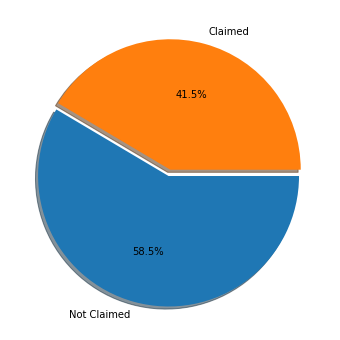

In [55]:
#Let us first analyze the distribution of the target variable

MAP={}
for i in range(len(labels)):
    MAP[i]=labels[i]
df1 = df.copy()
df1[target]=df1[target].map(MAP)
explode=np.zeros(len(labels))
explode[0]=0.05
print('\033[1mTarget Variable Distribution'.center(55))
plt.pie(df1[target].value_counts(), labels=df1[target].value_counts().index, counterclock=False, shadow=True, 
        explode=explode, autopct='%1.1f%%', radius=1)
plt.show()

**Inference:** The Target Variable seems to be alittle imbalanced! We shall try to fix this by augmenting data in the preprocessing step...

                               Visualising Categorical Features:                                


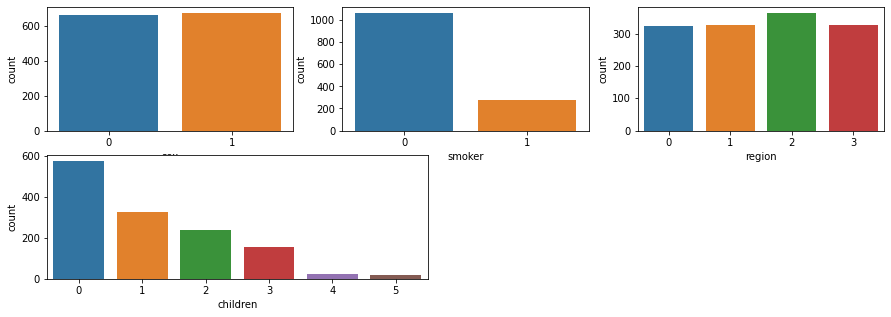

In [56]:
#Visualising the categorical features 

print('\033[1mVisualising Categorical Features:'.center(100))

n=3
plt.figure(figsize=[15,2.5*math.ceil(len(cf)/n)])

for i in range(len(cf)):
    if df[cf[i]].nunique()<=4:
        plt.subplot(math.ceil(len(cf)/n),n,i+1)
        sns.countplot(df[cf[i]])
    else:
        plt.subplot(math.ceil(len(cf)/2),2,i)
        sns.countplot(df[cf[i]])
plt.tight_layout()
plt.show()

**Inference:** Non smokers are dominant in the dataset. And children dependencies are sqewed towards the right.

                                                    Features Distribution                                                     


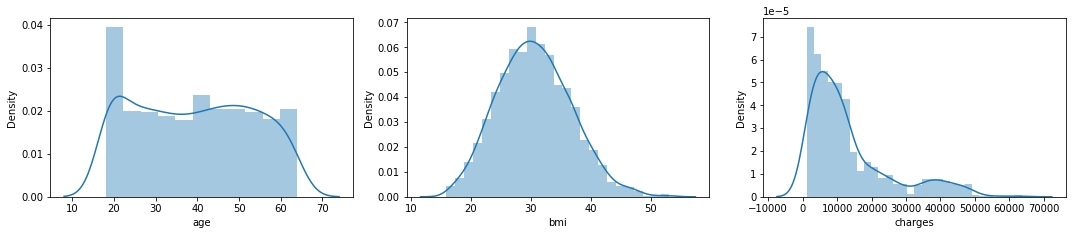

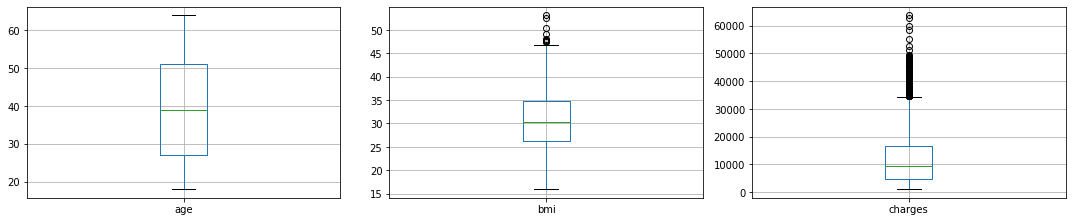

In [57]:
#Understanding the feature set

print('\033[1mFeatures Distribution'.center(130))

nf = [i for i in features if i not in cf]

plt.figure(figsize=[15,3*math.ceil(len(features)/4)])
for c in range(len(nf)):
    plt.subplot(math.ceil(len(features)/4),3,c+1)
    sns.distplot(df[nf[c]])
plt.tight_layout()
plt.show()

plt.figure(figsize=[15,3*math.ceil(len(features)/4)])
for c in range(len(nf)):
    plt.subplot(math.ceil(len(features)/4),3,c+1)
    df.boxplot(nf[c])
plt.tight_layout()
plt.show()

**Inference:** The data is somewhat normally distributed. And there are many outliers present in the dataset.

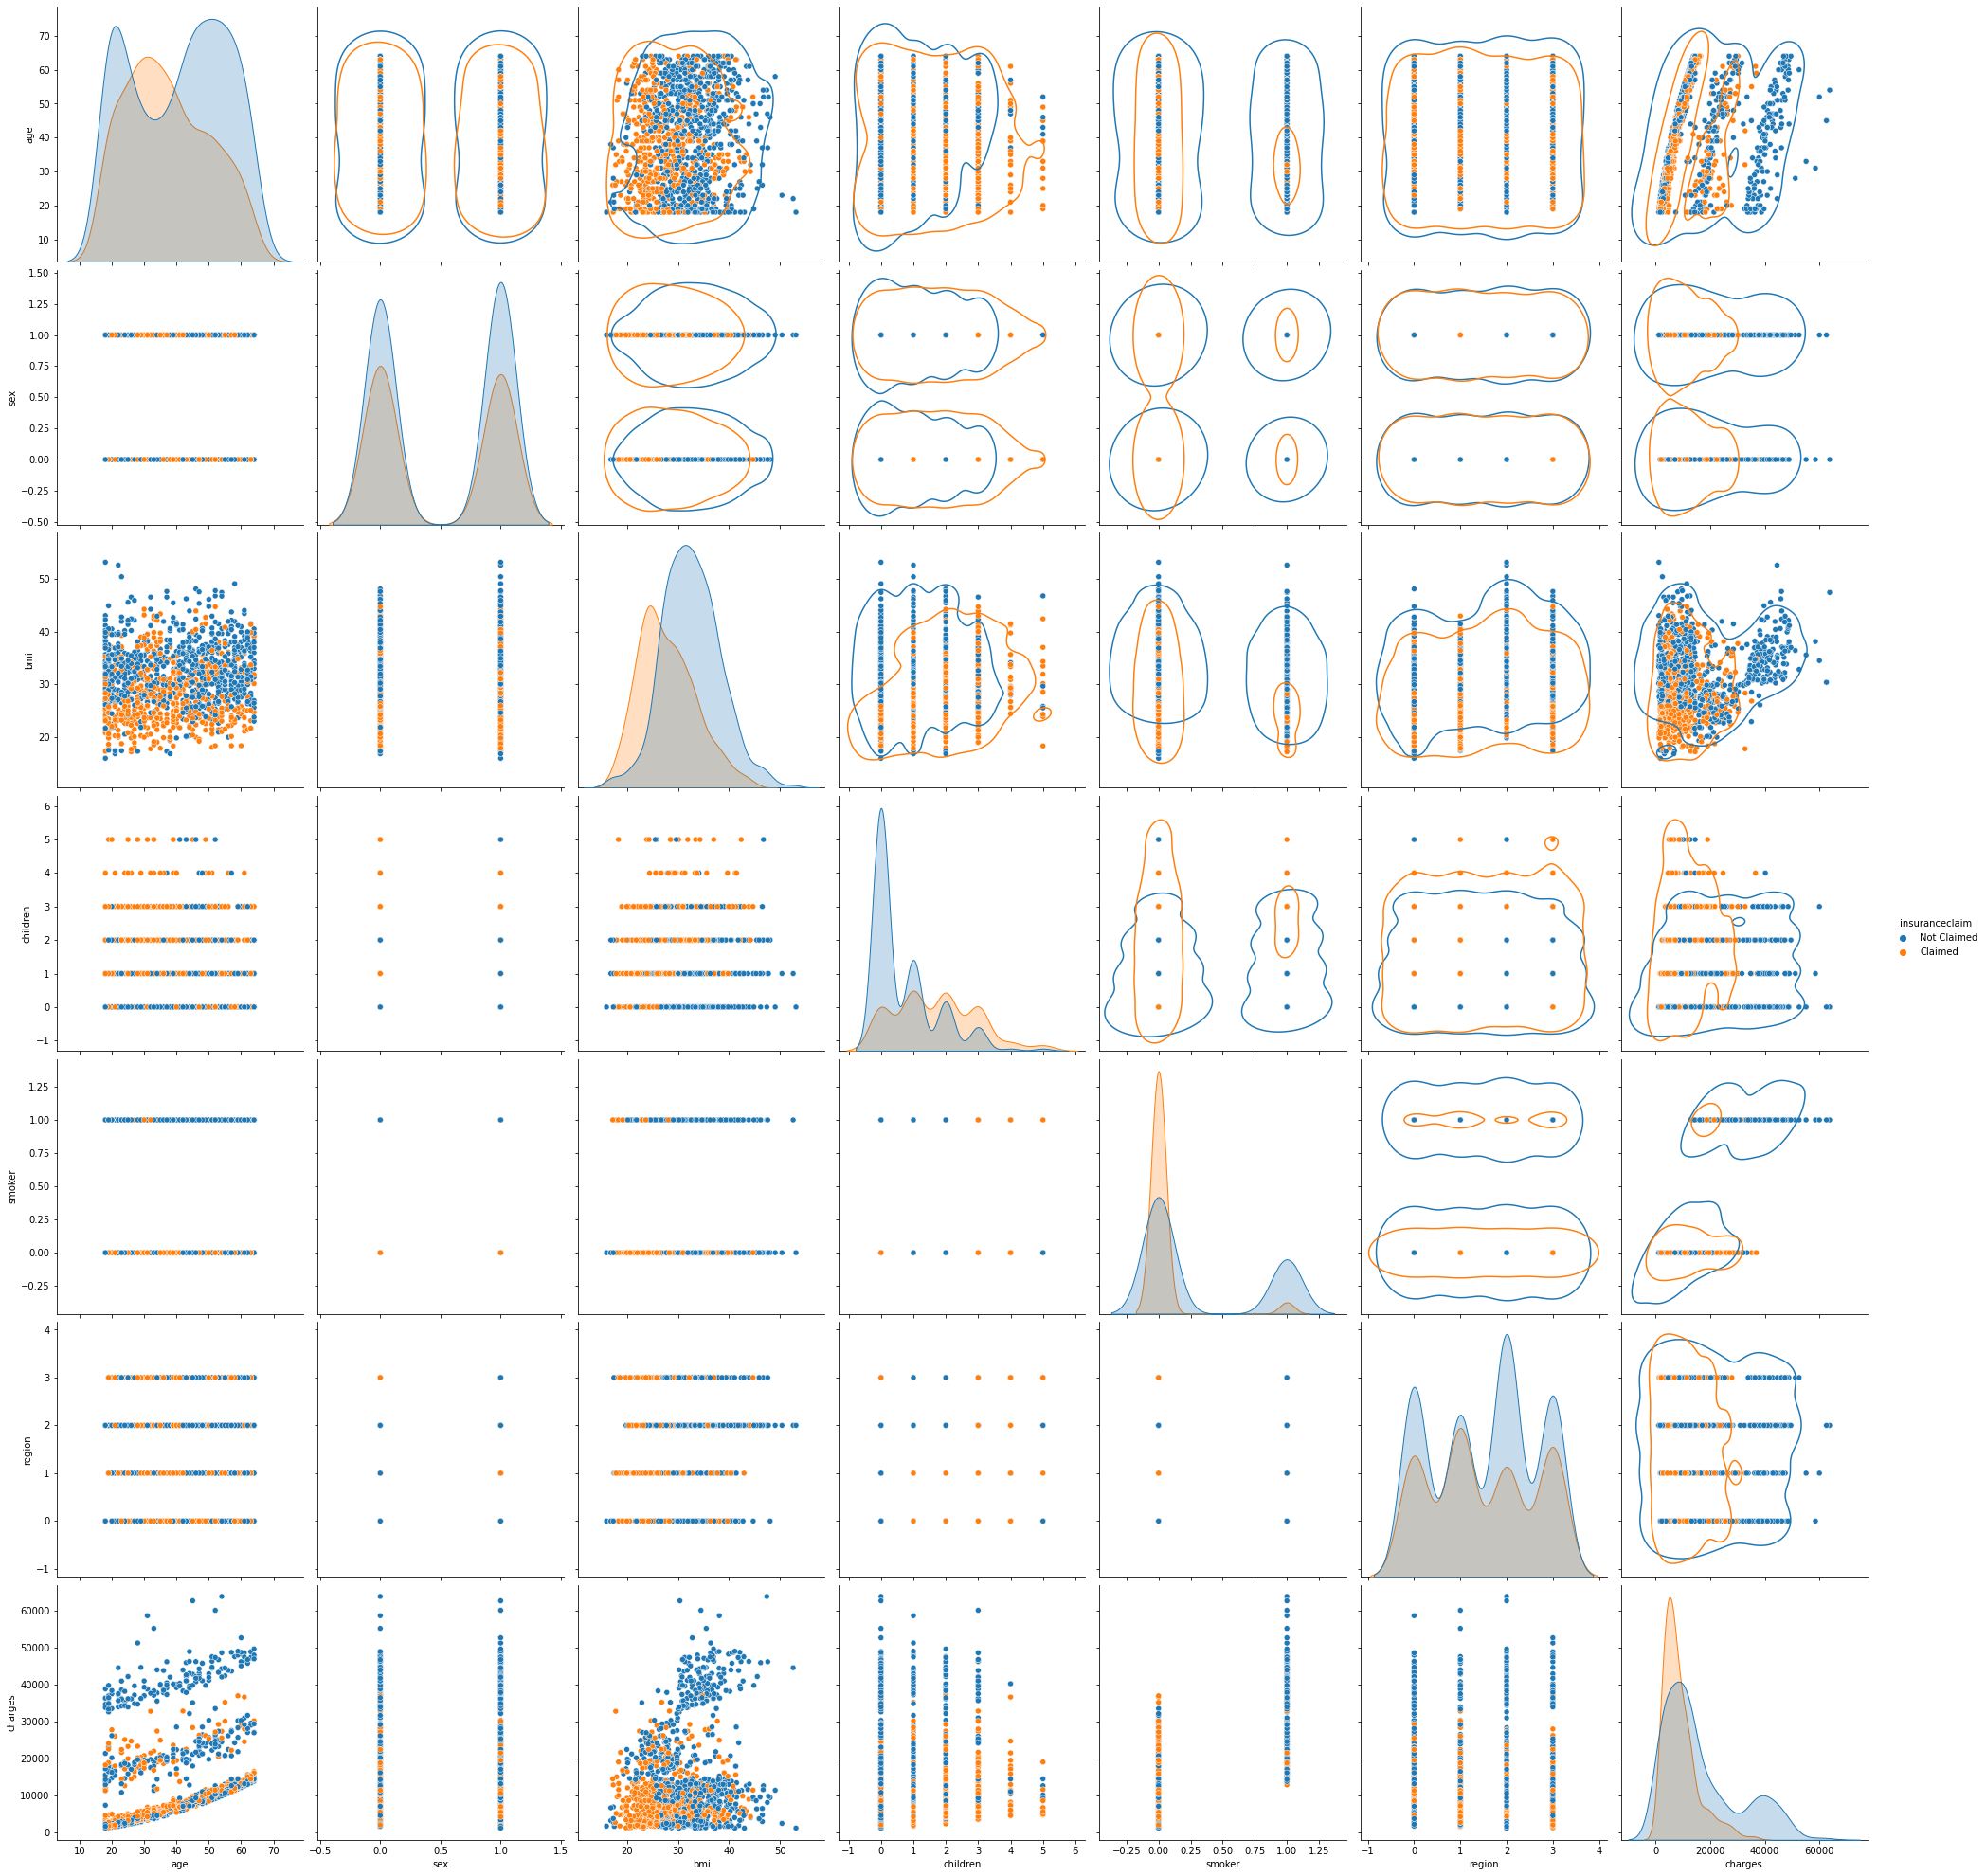

In [58]:
#Understanding the relationship between all the features

g=sns.pairplot(df1, hue=target, size=4)
g.map_upper(sns.kdeplot, levels=1, color=".2")
plt.show()

**Inference:** The data samples of most of the features do show some patterns. Also they seem
to have lot of overlap for the outcome classes, making it difficult to be distingusihable. 
Let is proceed to perform cleanup on the data to remove the irregularities...

---

## <center> 3. Data Preprocessing

In [59]:
#Check for empty elements

print(df.isnull().sum())
print('\n\033[1mInference:\033[0m The dataset doesn\'t have any null elements')

age               0
sex               0
bmi               0
children          0
smoker            0
region            0
charges           0
insuranceclaim    0
dtype: int64

Inference: The dataset doesn't have any null elements


In [60]:
#Removal of any Duplicate rows (if any)

counter = 0
r,c = original_df.shape

df1 = df.drop_duplicates()
df1.reset_index(drop=True,inplace=True)

if df1.shape==(r,c):
    print('\n\033[1mInference:\033[0m The dataset doesn\'t have any duplicates')
else:
    print(f'\n\033[1mInference:\033[0m Number of duplicates dropped ---> {r-df1.shape[0]}')


Inference: Number of duplicates dropped ---> 1


In [61]:
#Removal of outlier:

df2 = df1.copy()

for i in features:
    if df2[i].nunique()>=12:
        Q1 = df2[i].quantile(0.25)
        Q3 = df2[i].quantile(0.75)
        IQR = Q3 - Q1
        df2 = df2[df2[i] <= (Q3+(1.5*IQR))]
        df2 = df2[df2[i] >= (Q1-(1.5*IQR))]
df2 = df2.reset_index(drop=True)
display(df2.head())
print('\n\033[1mInference:\033[0m After removal of outliers, The dataset now has {} features & {} samples.'.format(df2.shape[1], df2.shape[0]))

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1



Inference: After removal of outliers, The dataset now has 8 features & 1190 samples.


In [62]:
#Converting categorical Columns to Numeric

from sklearn.preprocessing import OneHotEncoder

df3 = df2.copy()

#One-Hot Binay Encoding
oh=True
dm=True
for i in cf:
    #print(i)
    if df3[i].nunique()==2:
        if oh==True: print("One-Hot Encoding on features:")
        print(i);oh=False
        df3[i]=pd.get_dummies(df3[i], drop_first=True, prefix=str(i))
    if (df3[i].nunique()>2 and df2[i].nunique()<15):
        if dm==True: print("\nDummy Encoding on features:")
        print(i);dm=False
        df3 = pd.concat([df3.drop([i], axis=1), pd.DataFrame(pd.get_dummies(df3[i], drop_first=True, prefix=str(i)))],axis=1)
    

One-Hot Encoding on features:
sex
smoker

Dummy Encoding on features:
region
children


In [63]:
#Fixing the imbalance using SMOTE Technique
from imblearn.over_sampling import SMOTE

df4 = df3.copy()

print('Original class distribution:')
print(df4[target].value_counts())

xf = df4.columns
X = df4.drop([target],axis=1)
Y = df4[target]

smote = SMOTE()
X, Y = smote.fit_resample(X, Y)

df5 = pd.DataFrame(X, columns=xf)
df5[target] = Y

print('\nClass distribution after applying SMOTE Technique:',)
print(Y.value_counts())

Original class distribution:
1    638
0    552
Name: insuranceclaim, dtype: int64

Class distribution after applying SMOTE Technique:
1    638
0    638
Name: insuranceclaim, dtype: int64


In [64]:
df4.shape

(1190, 14)

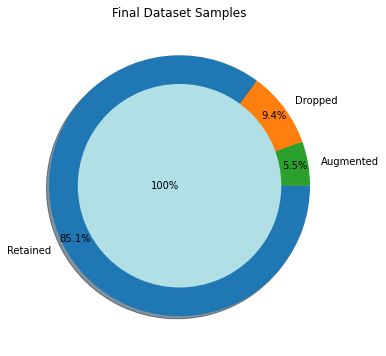


Inference:The final dataset after cleanup has 1338 samples & 8 rows.


In [65]:
#Final Dataset size after performing Preprocessing

plt.title('Final Dataset Samples')
plt.pie([df.shape[0], original_df.shape[0]-df4.shape[0], df5.shape[0]-df4.shape[0]], radius = 1, shadow=True,
        labels=['Retained','Dropped','Augmented'], counterclock=False, autopct='%1.1f%%', pctdistance=0.9, explode=[0,0,0])
plt.pie([df.shape[0]], labels=['100%'], labeldistance=-0, radius=0.78, shadow=True, colors=['powderblue'])
plt.show()

print('\n\033[1mInference:\033[0mThe final dataset after cleanup has {} samples & {} rows.'.format(df.shape[0], df.shape[1]))

---

## <center> 4. Data Manipulation

In [66]:
#Splitting the data intro training & testing sets

from sklearn.model_selection import train_test_split

df = df5.copy()

X = df.drop([target],axis=1)
Y = df[target]
Train_X, Test_X, Train_Y, Test_Y = train_test_split(X, Y, train_size=0.8, test_size=0.2, random_state=0)

print('Original set  ---> ',X.shape,Y.shape,'\nTraining set  ---> ',Train_X.shape,Train_Y.shape,'\nTesting set   ---> ', Test_X.shape,'', Test_Y.shape)

Original set  --->  (1276, 13) (1276,) 
Training set  --->  (1020, 13) (1020,) 
Testing set   --->  (256, 13)  (256,)


In [67]:
#Feature Scaling (Standardization)

from sklearn.preprocessing import StandardScaler

std = StandardScaler()

print('\033[1mStandardardization on Training set'.center(100))
Train_X_std = std.fit_transform(Train_X)
Train_X_std = pd.DataFrame(Train_X_std, columns=X.columns)
display(Train_X_std.describe())

print('\n','\033[1mStandardardization on Testing set'.center(100))
Test_X_std = std.transform(Test_X)
Test_X_std = pd.DataFrame(Test_X_std, columns=X.columns)
display(Test_X_std.describe())

                               Standardardization on Training set                               


,age,sex,bmi,smoker,charges,region_1,region_2,region_3,children_1,children_2,children_3,children_4,children_5
count,1.020000e+03,1.020000e+03,1.020000e+03,1.020000e+03,1.020000e+03,1.020000e+03,1.020000e+03,1.020000e+03,1.020000e+03,1.020000e+03,1.020000e+03,1.020000e+03,1.020000e+03
mean,3.483053e-18,1.864522e-16,-2.577459e-16,-2.013640e-17,2.389701e-16,1.691457e-16,1.569551e-16,-3.191347e-16,-9.904931e-17,-3.308900e-17,3.276246e-17,2.264528e-16,-4.349190e-16
std,1.000491e+00,1.000491e+00,1.000491e+00,1.000491e+00,1.000491e+00,1.000491e+00,1.000491e+00,1.000491e+00,1.000491e+00,1.000491e+00,1.000491e+00,1.000491e+00,1.000491e+00
min,-1.494710e+00,-9.483888e-01,-2.373202e+00,-3.459028e-01,-1.215187e+00,-5.833881e-01,-5.441149e-01,-5.426014e-01,-5.456280e-01,-4.503667e-01,-3.459028e-01,-1.449863e-01,-1.221694e-01
25%,-9.203898e-01,-9.483888e-01,-7.355457e-01,-3.459028e-01,-7.594494e-01,-5.833881e-01,-5.441149e-01,-5.426014e-01,-5.456280e-01,-4.503667e-01,-3.459028e-01,-1.449863e-01,-1.221694e-01
50%,1.287997e-02,-9.483888e-01,-6.240973e-02,-3.459028e-01,-2.310276e-01,-5.833881e-01,-5.441149e-01,-5.426014e-01,-5.456280e-01,-4.503667e-01,-3.459028e-01,-1.449863e-01,-1.221694e-01
75%,8.743597e-01,1.054420e+00,6.400854e-01,-3.459028e-01,4.065287e-01,1.714125e+00,-5.441149e-01,-5.426014e-01,-5.456280e-01,-4.503667e-01,-3.459028e-01,-1.449863e-01,-1.221694e-01
max,1.807629e+00,1.054420e+00,2.934528e+00,2.890986e+00,3.346933e+00,1.714125e+00,1.837847e+00,1.842974e+00,1.832750e+00,2.220413e+00,2.890986e+00,6.897204e+00,8.185353e+00



                                Standardardization on Testing set                                


,age,sex,bmi,smoker,charges,region_1,region_2,region_3,children_1,children_2,children_3,children_4,children_5
count,256.000000,256.000000,256.000000,256.000000,256.000000,256.000000,256.000000,256.000000,256.000000,256.000000,256.000000,256.000000,256.000000
mean,0.036997,-0.048690,0.078071,0.008132,-0.041342,-0.062858,0.088594,0.063111,0.021095,-0.043490,0.096641,-0.089969,-0.024816
std,1.015155,0.998178,1.018177,1.012241,0.918086,0.963639,1.054091,1.040343,1.015250,0.961635,1.114212,0.621226,0.895782
min,-1.494710,-0.948389,-1.849152,-0.345903,-1.212496,-0.583388,-0.544115,-0.542601,-0.545628,-0.450367,-0.345903,-0.144986,-0.122169
25%,-0.848600,-0.948389,-0.671763,-0.345903,-0.749892,-0.583388,-0.544115,-0.542601,-0.545628,-0.450367,-0.345903,-0.144986,-0.122169
50%,0.048775,-0.948389,0.015190,-0.345903,-0.184693,-0.583388,-0.544115,-0.542601,-0.545628,-0.450367,-0.345903,-0.144986,-0.122169
75%,0.892307,1.054420,0.739638,-0.345903,0.412814,-0.583388,1.837847,1.842974,-0.545628,-0.450367,-0.345903,-0.144986,-0.122169
max,1.807629,1.054420,2.896603,2.890986,3.232651,1.714125,1.837847,1.842974,1.832750,2.220413,2.890986,6.897204,8.185353


---

## <center> 5. Feature Selection/Extraction

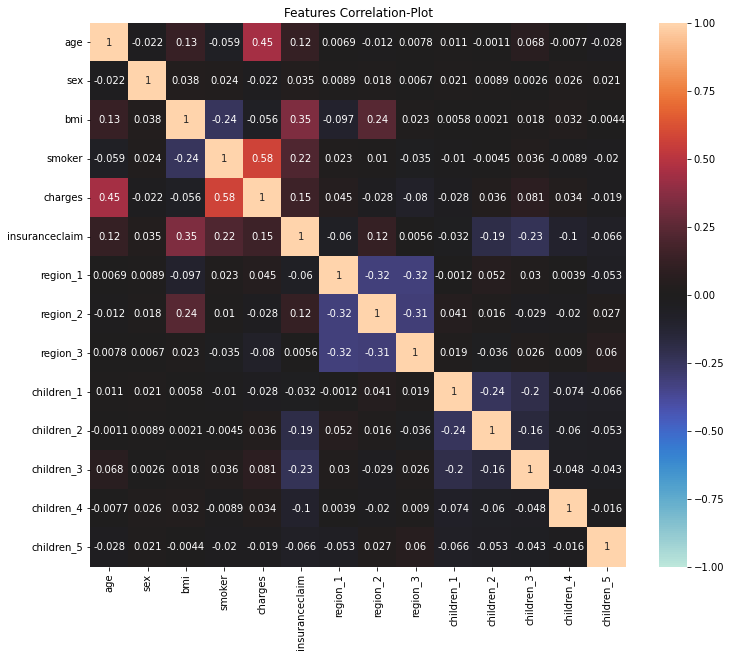

In [68]:
#Checking the correlation

features = df.columns
plt.figure(figsize=[12,10])
plt.title('Features Correlation-Plot')
sns.heatmap(df[features].corr(), annot=True, vmin=-1, vmax=1, center=0)
plt.show()

**Inference:** \
Correlation plt between the variables convey lot of information about the realationship betweem them. The features do not have some multi-collinearity between them like those of charges with age & smoking. Hence we shall perform Feature Selection/Extraction steps to take care of these multi-collinearity...

**Inference:** 
We can fix these multicollinearity with two techniques:
1. Manual Method - Variance Inflation Factor (VIF)
2. Automatic Method - Recursive Feature Elimination (RFE)

## 5a. Manual Method - VIF

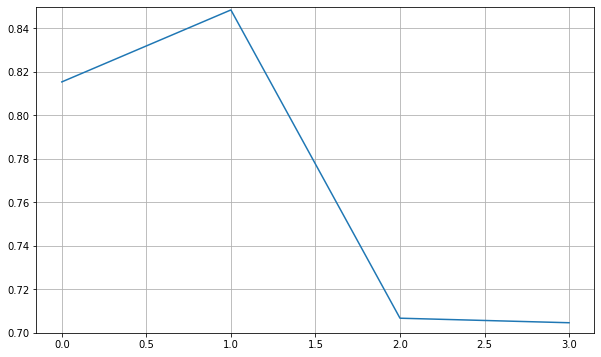

In [69]:
# Calculate the VIFs to remove multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import f1_score
from sklearn.linear_model import LogisticRegression

DROP=[]; scores=[]
scores.append(f1_score(Test_Y,LogisticRegression().fit(Train_X_std, Train_Y).predict(Test_X_std)))

for i in range(len(X.columns.values)-2):
    vif = pd.DataFrame()
    Xs = X.drop(DROP,axis=1)
    vif['Features'] = Xs.columns
    vif['VIF'] = [variance_inflation_factor(Xs.values, i) for i in range(Xs.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    vif.reset_index(drop=True, inplace=True)
    DROP.append(vif.Features[0])
    if vif.VIF[0]>=2.5:
        scores.append(f1_score(Test_Y,LogisticRegression().fit(Train_X_std.drop(DROP,axis=1), Train_Y).predict(Test_X_std.drop(DROP,axis=1))))

plt.plot(scores)
plt.ylim([0.7,0.85])
plt.grid()
plt.show()

## 5b. Automatic Method - RFE

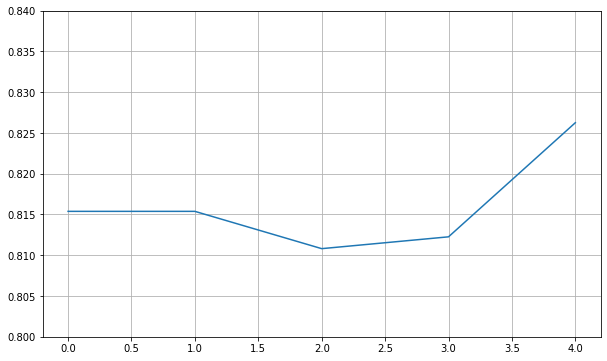

In [70]:
# Applying Recurrsive Feature Elimination
from sklearn.feature_selection import RFE

# Running RFE with the output number of the variable equal to 10
LR = LogisticRegression()#.fit(Train_X_std, Train_Y)
scores=[]

for i in range(5):
    rfe = RFE(LR,n_features_to_select=len(Train_X_std.columns)-i)   
    rfe = rfe.fit(Train_X_std, Train_Y)
    scores.append(f1_score(Test_Y,LR.fit(Train_X_std[Train_X_std.columns[rfe.support_]], Train_Y).predict(Test_X_std[Train_X_std.columns[rfe.support_]])))

plt.plot(scores)
plt.ylim([0.80,0.84])
plt.grid()
plt.show()

**Inference:** In both VIF & RFE Techniques, we can notice better scores upon dropping some multicollinear features. While the scores of RFE technique get a descent score, the VFE technique can increase the F2-score. Hence we shall use the features shortlisted by VIF Technique.

In [71]:
#Dropping the shortlisted features

vif = pd.DataFrame()
Xs = X.copy()#.drop(DROP,axis=1)
vif['Features'] = Xs.columns
vif['VIF'] = [variance_inflation_factor(Xs.values, i) for i in range(Xs.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif.reset_index(drop=True, inplace=True)
print('Dropping Feature -->',vif.Features[0])

Train_X_std = Train_X_std.drop([vif.Features[0]], axis=1)
Test_X_std = Test_X_std.drop([vif.Features[0]], axis=1)

Dropping Feature --> age


---

## <center> 6. Predictive Modeling

In [72]:
#Let us create first create a table to store the results of various models 

Evaluation_Results = pd.DataFrame(np.zeros((8,5)), columns=['Accuracy', 'Precision','Recall','F1-score','AUC-ROC score'])
Evaluation_Results.index=['Logistic Regression (LR)','Decision Tree Classifier (DT)','Random Forest Classifier (RF)','Naïve Bayes Classifier (NB)',
                         'Support Vector Machine (SVM)','K Nearest Neighbours (KNN)', 'Gradient Boosting (GB)','Extreme Gradient Boosting (XGB)']
Evaluation_Results

,Accuracy,Precision,Recall,F1-score,AUC-ROC score
Logistic Regression (LR),0.0,0.0,0.0,0.0,0.0
Decision Tree Classifier (DT),0.0,0.0,0.0,0.0,0.0
Random Forest Classifier (RF),0.0,0.0,0.0,0.0,0.0
Naïve Bayes Classifier (NB),0.0,0.0,0.0,0.0,0.0
Support Vector Machine (SVM),0.0,0.0,0.0,0.0,0.0
K Nearest Neighbours (KNN),0.0,0.0,0.0,0.0,0.0
Gradient Boosting (GB),0.0,0.0,0.0,0.0,0.0
Extreme Gradient Boosting (XGB),0.0,0.0,0.0,0.0,0.0


In [73]:
#Let us define functions to summarise the Prediction's scores .

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score, roc_auc_score, roc_curve, precision_score, recall_score

#Classification Summary Function
def Classification_Summary(pred,pred_prob,i):
    Evaluation_Results.iloc[i]['Accuracy']=round(accuracy_score(Test_Y, pred),3)*100   
    Evaluation_Results.iloc[i]['Precision']=round(precision_score(Test_Y, pred),3)*100 #, average='weighted'
    Evaluation_Results.iloc[i]['Recall']=round(recall_score(Test_Y, pred),3)*100 #, average='weighted'
    Evaluation_Results.iloc[i]['F1-score']=round(f1_score(Test_Y, pred),3)*100 #, average='weighted'
    Evaluation_Results.iloc[i]['AUC-ROC score']=round(roc_auc_score(Test_Y, pred),3)*100 #, multi_class='ovr'
    print('{}{}\033[1m Evaluating {} \033[0m{}{}\n'.format('<'*3,'-'*35,Evaluation_Results.index[i], '-'*35,'>'*3))
    print('Accuracy = {}%'.format(round(accuracy_score(Test_Y, pred),3)*100))
    print('F1 Score = {}%'.format(round(f1_score(Test_Y, pred),3)*100)) #, average='weighted'
    print('\n \033[1mConfusiton Matrix:\033[0m\n',confusion_matrix(Test_Y, pred))
    print('\n\033[1mClassification Report:\033[0m\n',classification_report(Test_Y, pred))
    
    auc_roc(Test_Y, pred_prob, curves=['each_class'])
    plt.show()

#Visualising Function
def AUC_ROC_plot(Test_Y, pred):    
    ref = [0 for _ in range(len(Test_Y))]
    ref_auc = roc_auc_score(Test_Y, ref)
    lr_auc = roc_auc_score(Test_Y, pred)

    ns_fpr, ns_tpr, _ = roc_curve(Test_Y, ref)
    lr_fpr, lr_tpr, _ = roc_curve(Test_Y, pred)

    plt.plot(ns_fpr, ns_tpr, linestyle='--')
    plt.plot(lr_fpr, lr_tpr, marker='.', label='AUC = {}'.format(round(roc_auc_score(Test_Y, pred)*100,2))) 
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    plt.show()

---

## 1. Logistic Regression:

<<<----------------------------------- Evaluating Logistic Regression (LR) ----------------------------------->>>

Accuracy = 84.39999999999999%
F1 Score = 84.8%

 Confusiton Matrix:
 [[104  20]
 [ 20 112]]

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.84      0.84       124
           1       0.85      0.85      0.85       132

    accuracy                           0.84       256
   macro avg       0.84      0.84      0.84       256
weighted avg       0.84      0.84      0.84       256



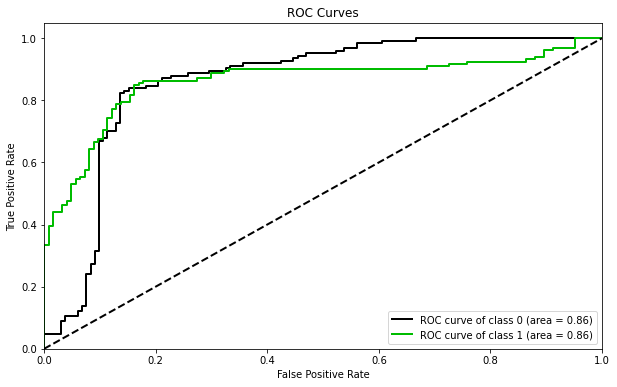

In [74]:
#Logistic Regression

from scipy.stats import loguniform
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RandomizedSearchCV

LR_model = LogisticRegression()

space = dict()
space['solver'] = ['newton-cg', 'lbfgs', 'liblinear']
space['penalty'] = ['none', 'l1', 'l2', 'elasticnet']
space['C'] = loguniform(1e-5, 100)

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

RCV = RandomizedSearchCV(LR_model, space, n_iter=50, scoring='roc_auc', n_jobs=-1, cv=5, random_state=1)

LR = RCV.fit(Train_X_std, Train_Y)
pred = LR.best_estimator_.predict(Test_X_std)
pred_prob = LR.best_estimator_.predict_proba(Test_X_std)
Classification_Summary(pred,pred_prob,0)

---

## 2. Decisoin Tree Classfier:

<<<----------------------------------- Evaluating Decision Tree Classifier (DT) ----------------------------------->>>

Accuracy = 88.7%
F1 Score = 88.9%

 Confusiton Matrix:
 [[111  13]
 [ 16 116]]

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.90      0.88       124
           1       0.90      0.88      0.89       132

    accuracy                           0.89       256
   macro avg       0.89      0.89      0.89       256
weighted avg       0.89      0.89      0.89       256



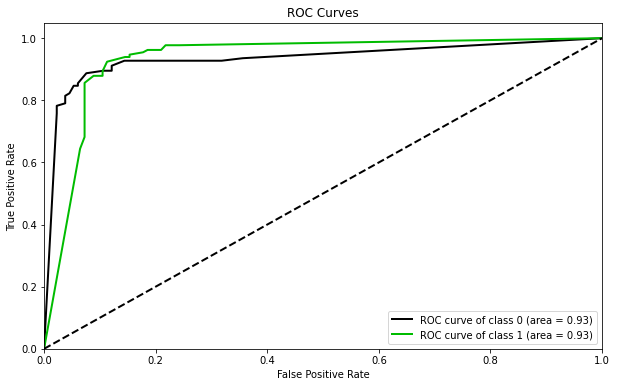

In [75]:
from scipy.stats import randint
from sklearn.tree import DecisionTreeClassifier

DT_model = DecisionTreeClassifier()

param_dist = {"max_depth": [3, None],
              "max_features": randint(1, 9),
              "min_samples_leaf": randint(1, 9),
              "criterion": ["gini", "entropy"]}

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

RCV = RandomizedSearchCV(DT_model, param_dist, n_iter=50, scoring='roc_auc', n_jobs=-1, cv=5, random_state=1)

DT = RCV.fit(Train_X_std, Train_Y)
pred = DT.best_estimator_.predict(Test_X_std)
pred_prob = DT.best_estimator_.predict_proba(Test_X_std)
Classification_Summary(pred,pred_prob,1)

---

## 3. Random Forest Classfier:

<<<----------------------------------- Evaluating Random Forest Classifier (RF) ----------------------------------->>>

Accuracy = 87.1%
F1 Score = 87.3%

 Confusiton Matrix:
 [[110  14]
 [ 19 113]]

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.89      0.87       124
           1       0.89      0.86      0.87       132

    accuracy                           0.87       256
   macro avg       0.87      0.87      0.87       256
weighted avg       0.87      0.87      0.87       256



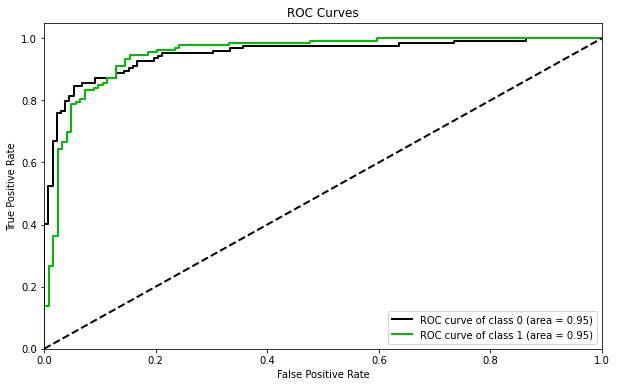

In [76]:
from sklearn.ensemble import RandomForestClassifier

RF_model = RandomForestClassifier()

param_dist={'bootstrap': [True, False],
            'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
            'max_features': ['auto', 'sqrt'],
            'min_samples_leaf': [1, 2, 4],
            'min_samples_split': [2, 5, 10],
            'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

RCV = RandomizedSearchCV(RF_model, param_dist, n_iter=50, scoring='roc_auc', n_jobs=-1, cv=5, random_state=1)

RF = RCV.fit(Train_X_std, Train_Y)
pred = RF.best_estimator_.predict(Test_X_std)
pred_prob = RF.best_estimator_.predict_proba(Test_X_std)
Classification_Summary(pred,pred_prob,2)

---

## 4. Naive Bayes Classfier:

<<<----------------------------------- Evaluating Naïve Bayes Classifier (NB) ----------------------------------->>>

Accuracy = 73.8%
F1 Score = 74.5%

 Confusiton Matrix:
 [[91 33]
 [34 98]]

Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.73      0.73       124
           1       0.75      0.74      0.75       132

    accuracy                           0.74       256
   macro avg       0.74      0.74      0.74       256
weighted avg       0.74      0.74      0.74       256



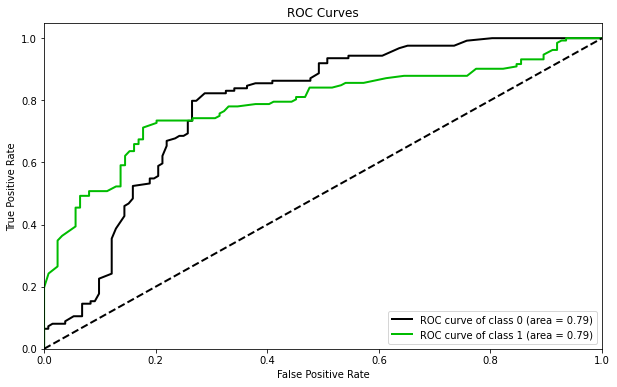

In [77]:
from sklearn.naive_bayes import BernoulliNB

NB_model = BernoulliNB()

params = {'alpha': [0.01, 0.1, 0.5, 1.0, 10.0]}
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

RCV = RandomizedSearchCV(NB_model, params, n_iter=50, scoring='roc_auc', n_jobs=-1, cv=5, random_state=1)

NB = RCV.fit(Train_X_std, Train_Y)
pred = NB.best_estimator_.predict(Test_X_std)
pred_prob = NB.best_estimator_.predict_proba(Test_X_std)
Classification_Summary(pred,pred_prob,3)

---

## 5. Support Vector Machine Classfier:

<<<----------------------------------- Evaluating Support Vector Machine (SVM) ----------------------------------->>>

Accuracy = 83.2%
F1 Score = 83.0%

 Confusiton Matrix:
 [[108  16]
 [ 27 105]]

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.87      0.83       124
           1       0.87      0.80      0.83       132

    accuracy                           0.83       256
   macro avg       0.83      0.83      0.83       256
weighted avg       0.83      0.83      0.83       256



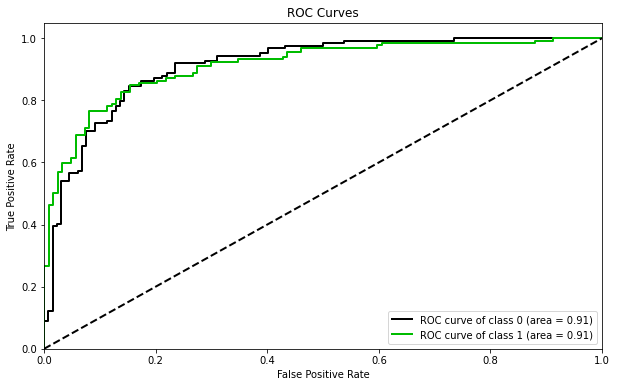

In [78]:
import scipy
from sklearn.svm import SVC

SVM_model = SVC(probability=True).fit(Train_X_std, Train_Y)

svm_param = {"C": [.01, .1, 1, 5, 10, 100],             
             "gamma": [0, .01, .1, 1, 5, 10, 100],
             "kernel": ["rbf"],
             "random_state": [1]}

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

RCV = RandomizedSearchCV(SVM_model, svm_param, n_iter=50, scoring='roc_auc', n_jobs=-1, cv=5, random_state=1)

SVM = RCV.fit(Train_X_std, Train_Y)
pred = SVM.best_estimator_.predict(Test_X_std)
pred_prob = SVM.best_estimator_.predict_proba(Test_X_std)
Classification_Summary(pred,pred_prob,4)

---

## 6. K-Nearest Neighbours Classfier:

<<<----------------------------------- Evaluating K Nearest Neighbours (KNN) ----------------------------------->>>

Accuracy = 85.9%
F1 Score = 86.2%

 Confusiton Matrix:
 [[108  16]
 [ 20 112]]

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.87      0.86       124
           1       0.88      0.85      0.86       132

    accuracy                           0.86       256
   macro avg       0.86      0.86      0.86       256
weighted avg       0.86      0.86      0.86       256



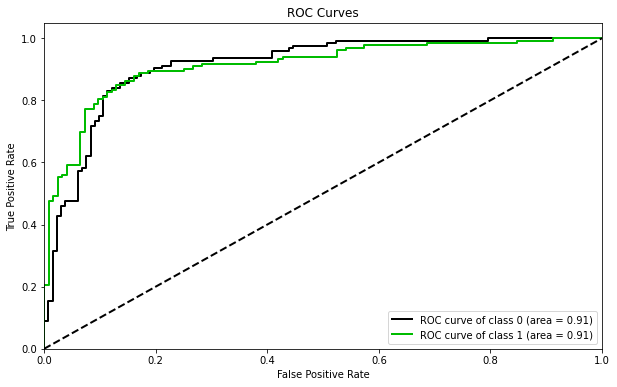

In [79]:
from sklearn.neighbors import KNeighborsClassifier

KNN_model = KNeighborsClassifier()

knn_param = {"n_neighbors": [i for i in range(1,30,5)],
             "weights": ["uniform", "distance"],
             "algorithm": ["ball_tree", "kd_tree", "brute"],
             "leaf_size": [1, 10, 30],
             "p": [1,2]}

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

RCV = RandomizedSearchCV(KNN_model, knn_param, n_iter=50, scoring='roc_auc', n_jobs=-1, cv=5, random_state=1)

KNN = RCV.fit(Train_X_std, Train_Y)
pred = KNN.best_estimator_.predict(Test_X_std)
pred_prob = KNN.best_estimator_.predict_proba(Test_X_std)
Classification_Summary(pred,pred_prob,5)

---

## 7. Gradient Boosting Classfier:

<<<----------------------------------- Evaluating Gradient Boosting (GB) ----------------------------------->>>

Accuracy = 91.4%
F1 Score = 91.7%

 Confusiton Matrix:
 [[112  12]
 [ 10 122]]

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.90      0.91       124
           1       0.91      0.92      0.92       132

    accuracy                           0.91       256
   macro avg       0.91      0.91      0.91       256
weighted avg       0.91      0.91      0.91       256



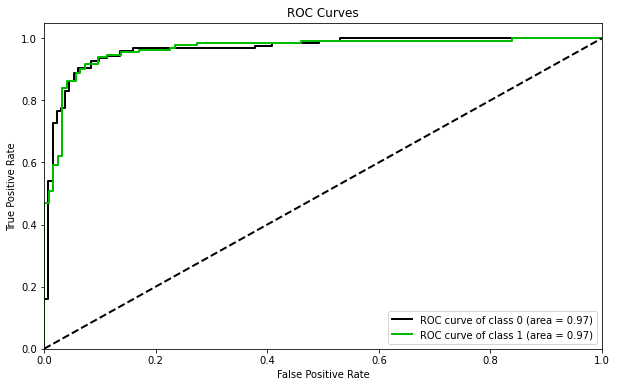

In [80]:
from sklearn.ensemble import GradientBoostingClassifier

GB_model = GradientBoostingClassifier().fit(Train_X_std, Train_Y)
param_dist = {
    "n_estimators":[5,50,250,500],
    "max_depth":[1,3,5,7,9],
    "learning_rate":[0.01,0.1,1,10,100]
}

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

RCV = RandomizedSearchCV(GB_model, param_dist, n_iter=50, scoring='roc_auc', n_jobs=-1, cv=5, random_state=1)

GB = RCV.fit(Train_X_std, Train_Y)
pred = GB.best_estimator_.predict(Test_X_std)
pred_prob = GB.best_estimator_.predict_proba(Test_X_std)
Classification_Summary(pred,pred_prob,6)

---

## 8. Extreme Gradient Boosting Classfier:

<<<----------------------------------- Evaluating Extreme Gradient Boosting (XGB) ----------------------------------->>>

Accuracy = 93.0%
F1 Score = 93.30000000000001%

 Confusiton Matrix:
 [[113  11]
 [  7 125]]

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.91      0.93       124
           1       0.92      0.95      0.93       132

    accuracy                           0.93       256
   macro avg       0.93      0.93      0.93       256
weighted avg       0.93      0.93      0.93       256



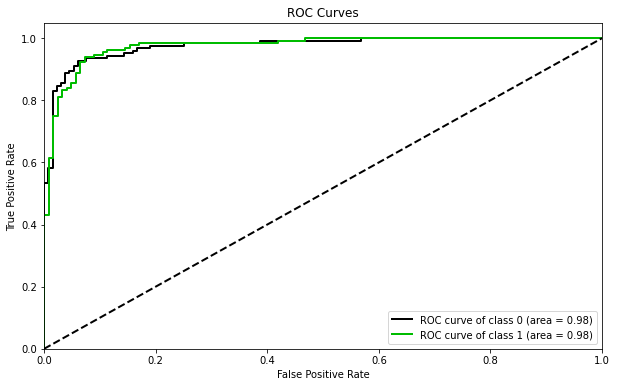

In [81]:
from xgboost import XGBClassifier

XGB_model = XGBClassifier().fit(Train_X_std, Train_Y)

param_dist = {
 "learning_rate" : [0.05,0.10,0.15,0.20,0.25,0.30],
 "max_depth" : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma": [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
}

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

RCV = RandomizedSearchCV(XGB_model, param_dist, n_iter=50, scoring='roc_auc', n_jobs=-1, cv=5, random_state=1)

XGB = RCV.fit(Train_X_std, Train_Y)
pred = XGB.best_estimator_.predict(Test_X_std)
pred_prob = XGB.best_estimator_.predict_proba(Test_X_std)
Classification_Summary(pred,pred_prob,7)

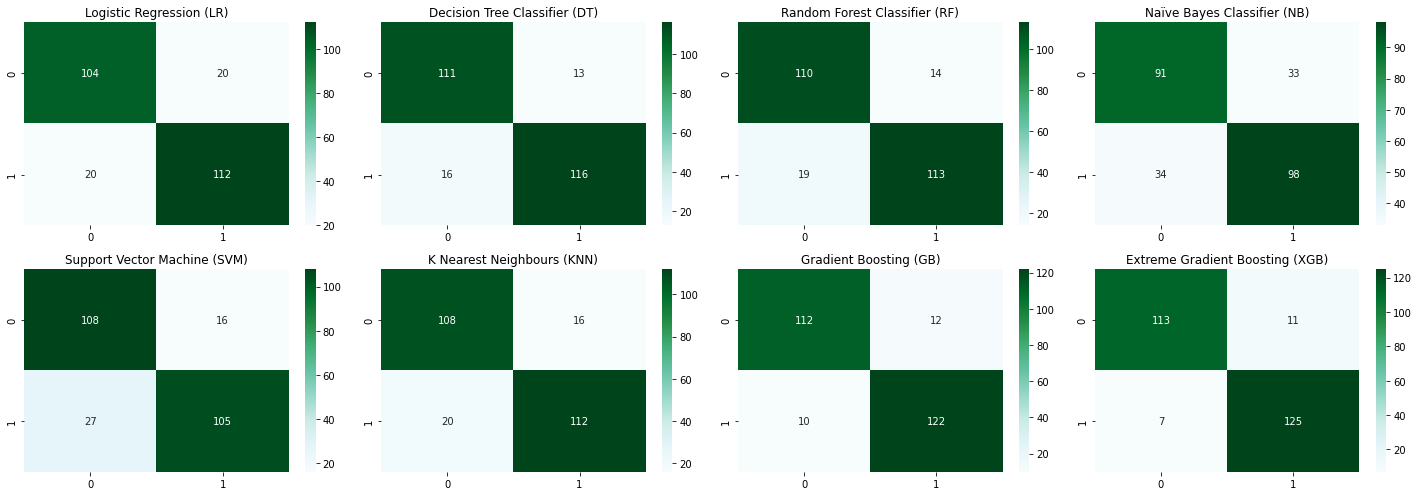

In [88]:
#Plotting Confusion-Matrix of all the predictive Models

def plot_cm(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred, labels=np.unique(y_true))
    cm_sum = np.sum(cm, axis=1, keepdims=True)
    cm_perc = cm / cm_sum.astype(float) * 100
    annot = np.empty_like(cm).astype(str)
    nrows, ncols = cm.shape
    for i in range(nrows):
        for j in range(ncols):
            c = cm[i, j]
            p = cm_perc[i, j]
            if i == j:
                s = cm_sum[i]
                annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)
            elif c == 0:
                annot[i, j] = ''
            else:
                annot[i, j] = '%.1f%%\n%d' % (p, c)
    cm = pd.DataFrame(cm, index=np.unique(y_true), columns=np.unique(y_true))
    cm.columns=labels
    cm.index=labels
    cm.index.name = 'Actual'
    cm.columns.name = 'Predicted'
    #fig, ax = plt.subplots()
    sns.heatmap(cm, annot=annot, fmt='')# cmap= "GnBu"
    
def conf_mat_plot(all_models):
    plt.figure(figsize=[20,3.5*math.ceil(len(all_models)*len(labels)/14)])
    
    for i in range(len(all_models)):
        if len(labels)<=4:
            plt.subplot(2,4,i+1)
        else:
            plt.subplot(math.ceil(len(all_models)/3),3,i+1)
        pred = all_models[i].predict(Test_X_std)
        #plot_cm(Test_Y, pred)
        sns.heatmap(confusion_matrix(Test_Y, pred), annot=True, cmap='BuGn', fmt='.0f') #vmin=0,vmax=5
        plt.title(Evaluation_Results.index[i])
    plt.tight_layout()
    plt.show()

conf_mat_plot([LR,DT,RF,NB,SVM,KNN,GB,XGB])

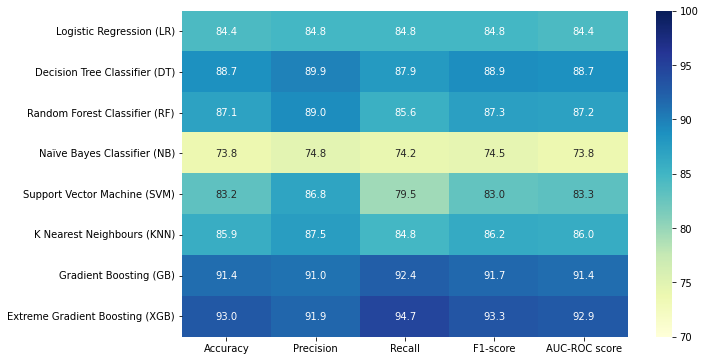

In [83]:
#Comparing all the models Scores

#plt.figure(figsize=[12,5])
sns.heatmap(Evaluation_Results, annot=True, vmin=70.0, vmax=100.0, cmap='YlGnBu', fmt='.1f')
plt.show()

**Insights:** For the current problem statement, it is more important to focus on the F1-score. Except Naive Baye's Classifier, most of the algorithms perform well. The best performing algorithm is Extreme Gradient Boosting Classifier...

---

## <center> 7. Project Outcomes & Conclusions

### Here are some of the key outcomes of the project:
- The Dataset was small totally around 1338 samples & after preprocessing 17% of the datasamples were dropped. 
- The samples were highly imbalanced, hence SMOTE Technique was applied on the data to  balance the classes, adding 5.5% more samples to the dataset.
- Visualising the distribution of data & their relationships, helped us to get some insights on the relationship between the featureset.
- Feature Selection/Eliminination was carried out and appropriate features were shortlisted.
- Testing multiple algorithms with fine-tuning hyperparamters gave us some understanding on the model performance for various algorithms on this specific dataset.
- The boosting & ensemble algorithms perform the best on the current dataset, followed by Nearest Neighbours Algorithm.
- Yet it wise to also consider simpler model like Logistic Regression as it is more generalisable & is computationally less expensive.

In [ ]:
<<<----------------------------------------------------------THE END----------------------------------------------------------------->>>